<a href="https://colab.research.google.com/github/Gabrielghj/RSI-Trading-Signal-Detector/blob/main/RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de Bibliotecas

pandas: Para manipular y analizar datos estructurados.

numpy: Para realizar cálculos numéricos.

matplotlib: Para crear gráficos y visualizaciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Función para Calcular el RSI

Esta función calcula el RSI (Relative Strength Index):

delta: Calcula la diferencia de precios entre días consecutivos.

gains y losses: Separan las ganancias y las pérdidas.

avg_gain y avg_loss: Calculan la media móvil de las ganancias y pérdidas durante el período especificado.

rs: Calcula la relación de ganancias/pérdidas.

rsi: Calcula el valor del RSI utilizando la fórmula estándar.

La función devuelve el RSI para los datos y período especificados.

In [2]:
def calculate_rsi(data, period):
    delta = data.diff()
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    avg_gain = gains.rolling(window=period, min_periods=1).mean()
    avg_loss = losses.rolling(window=period, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


Generar Datos Simulados

Aquí se generan datos simulados para probar el código:

np.random.seed(42): Establece una semilla para asegurar la reproducibilidad.

dates: Crea una serie de 200 fechas a partir del 1 de enero de 2023.

prices: Genera una serie de precios simulados utilizando una caminata aleatoria (random walk) a partir de 100.

In [3]:
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=200)
prices = 100 + np.cumsum(np.random.normal(0, 1, size=200))


Crear un DataFrame con los Datos

Se crea un DataFrame de pandas con las fechas y los precios simulados.

In [4]:
data = pd.DataFrame({'Date': dates, 'Close': prices})


Calcular RSI Rápido (14 días) y Lento (30 días)

Se calculan dos RSI:

RSI_14: Utilizando un período de 14 días (rápido).

RSI_30: Utilizando un período de 30 días (lento).

In [5]:
data['RSI_14'] = calculate_rsi(data['Close'], 14)
data['RSI_30'] = calculate_rsi(data['Close'], 30)


Determinar Señales de Compra/Venta

Se determinan las señales de compra y venta basadas en los cruces de los RSI:

Neutral: Valor inicial de las señales.

Compra: Cuando el RSI rápido (14) es mayor que el RSI lento (30).

Venta: Cuando el RSI rápido (14) es menor que el RSI lento (30).

In [6]:
data['Signal'] = 'Neutral'
data.loc[data['RSI_14'] > data['RSI_30'], 'Signal'] = 'Compra'
data.loc[data['RSI_14'] < data['RSI_30'], 'Signal'] = 'Venta'


Crear Columnas para Marcar Precios en Señales

Se crean columnas para marcar los precios en los puntos de compra y venta:

Buy_Signal_Price: Precio de cierre cuando hay una señal de compra.

Sell_Signal_Price: Precio de cierre cuando hay una señal de venta.

In [7]:
data['Buy_Signal_Price'] = np.where(data['Signal'] == 'Compra', data['Close'], np.nan)
data['Sell_Signal_Price'] = np.where(data['Signal'] == 'Venta', data['Close'], np.nan)


Graficar Resultados
Finalmente, se grafican los resultados:

El primer subgráfico muestra el precio de cierre con los puntos de compra y venta.

El segundo subgráfico muestra los valores del RSI rápido y lento, con líneas horizontales para las zonas de sobrecompra y sobreventa.

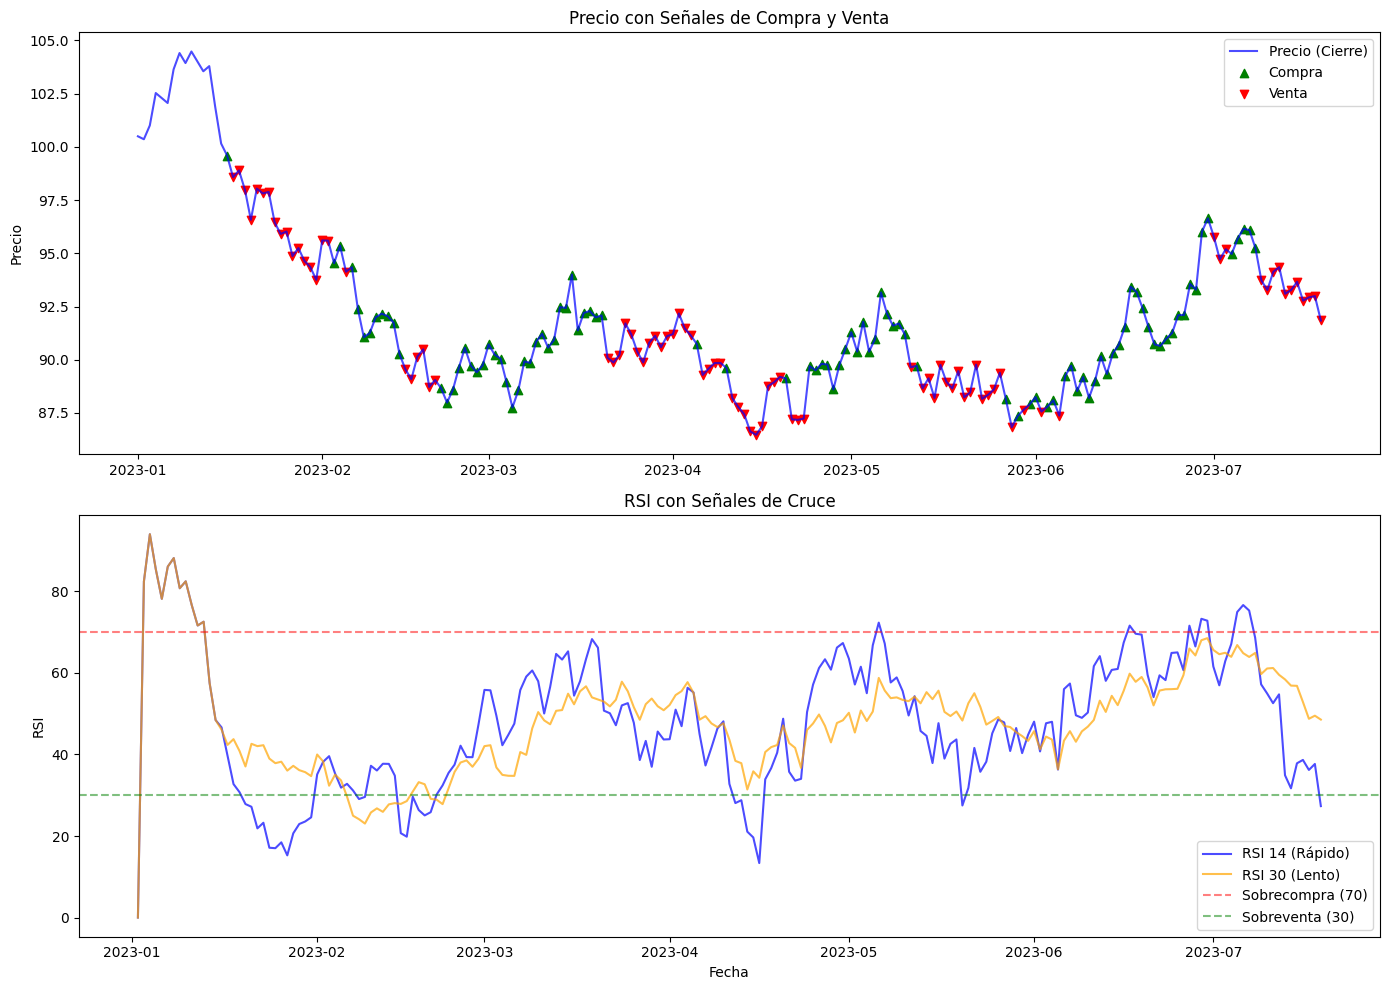

In [8]:
plt.figure(figsize=(14, 10))

# Subgráfico 1: Precio con señales
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['Close'], label='Precio (Cierre)', color='blue', alpha=0.7)
plt.scatter(data['Date'], data['Buy_Signal_Price'], label='Compra', marker='^', color='green', alpha=1)
plt.scatter(data['Date'], data['Sell_Signal_Price'], label='Venta', marker='v', color='red', alpha=1)
plt.title('Precio con Señales de Compra y Venta')
plt.ylabel('Precio')
plt.legend()

# Subgráfico 2: RSI y señales
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['RSI_14'], label='RSI 14 (Rápido)', color='blue', alpha=0.7)
plt.plot(data['Date'], data['RSI_30'], label='RSI 30 (Lento)', color='orange', alpha=0.7)
plt.axhline(70, color='red', linestyle='--', label='Sobrecompra (70)', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', label='Sobreventa (30)', alpha=0.5)
plt.title('RSI con Señales de Cruce')
plt.ylabel('RSI')
plt.xlabel('Fecha')
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()
